In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# convert csv to pandas dataframe and print it in a table

# read csv file
df = pd.read_csv('data_2.csv')

# convert to numpy array
df = df.to_numpy()

# convert to pandas dataframe
df = pd.DataFrame(df)

# rename columns time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.pose.position.x,.pose.position.y,.pose.position.z,.pose.orientation.x,.pose.orientation.y,.pose.orientation.z,.pose.orientation.w

df.columns = ['time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id', 'pose.position.x', 'pose.position.y', 'pose.position.z', 'pose.orientation.x', 'pose.orientation.y', 'pose.orientation.z', 'pose.orientation.w']


# df_new with only columns time,pose.position.x,pose.position.y,pose.position.z in reverse order and in colum time take  only after :
df_new = df[['time', 'pose.position.x', 'pose.position.y', 'pose.position.z']]
df_new['time'] = df_new['time'].str[17:]

# subtract the first value of time from all values of time
df_new['time'] = df_new['time'].astype(float)
df_new['time'] = df_new['time'] - df_new['time'][0]

/tmp/ipykernel_13246/268240857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time'] = df_new['time'].str[17:]
/tmp/ipykernel_13246/268240857.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time'] = df_new['time'].astype(float)
/tmp/ipykernel_13246/268240857.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [3]:
df_new
# %matplotlib inline

,time,pose.position.x,pose.position.y,pose.position.z
0,0.000000,-0.926428,-1.109085,0.528701
1,0.000040,-0.470109,-0.840116,0.221063
2,0.000448,-0.462837,-0.833741,0.270618
3,0.000452,-0.3419,-0.730808,0.720408
4,0.009708,-0.330456,-0.721485,0.763209
...,...,...,...,...
146,1.249809,1.543032,0.609374,0.518548
147,1.249823,1.563967,0.62226,0.530054
148,1.259765,1.585864,0.635272,0.537265
149,1.270007,1.606115,0.647818,0.541297


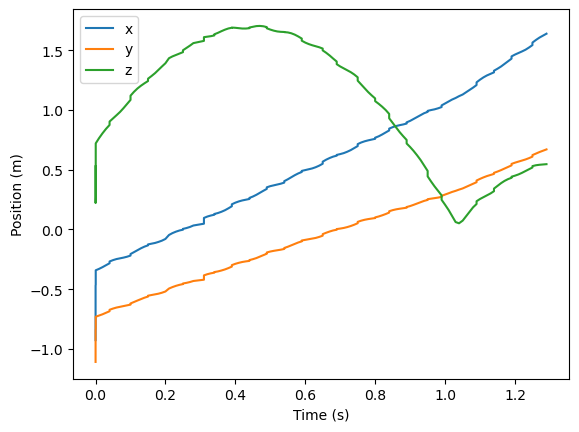

In [4]:
# convert df_new to a numpy array
df_new_numpy_array = df_new.to_numpy()

# df_new_numpy_array[][0] = time, df_new_numpy_array[][1] = x, df_new_numpy_array[][2] = y, df_new_numpy_array[][3] = z plot them

# plot the x, y, z coordinates
plt.plot(df_new_numpy_array[:,0], df_new_numpy_array[:,1], label='x')
plt.plot(df_new_numpy_array[:,0], df_new_numpy_array[:,2], label='y')
plt.plot(df_new_numpy_array[:,0], df_new_numpy_array[:,3], label='z')

# add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

# show the plot
plt.show()

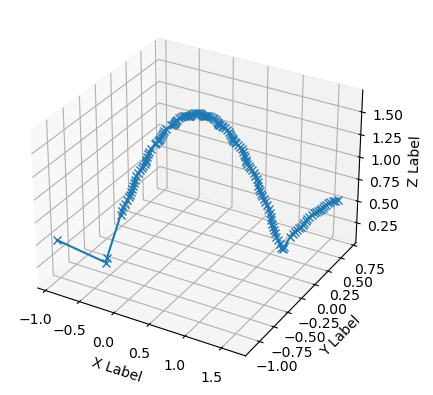

In [5]:
# plot using matplotlib.animation and mpl_toolkits.mplot3d and matplotlib.pyplot from df_new_numpy_array

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_new_numpy_array[:,1], df_new_numpy_array[:,2], df_new_numpy_array[:,3], marker='x')
# ax.scatter(df_new_numpy_array[:,1], df_new_numpy_array[:,2], df_new_numpy_array[:,3], c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Remove unwanted part of the trajectory

In [6]:
# in df_new_numpy_array remove first three rows and store in df_new1_numpy_array

final_data = df_new_numpy_array[3: 123]
np.shape(final_data)

(120, 4)

Text(0.5, 0, 'Z Label')

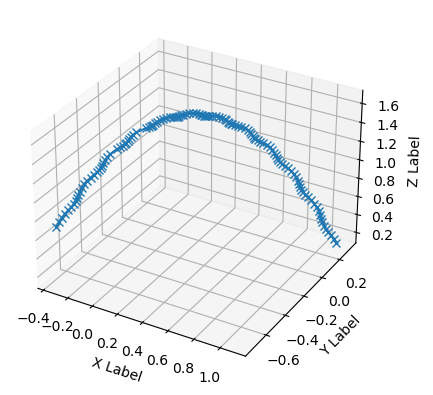

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(final_data[:,1], final_data[:,2], final_data[:,3], marker='x')
# ax.scatter(df_new_numpy_array[:,1], df_new_numpy_array[:,2], df_new_numpy_array[:,3], c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### Approximation
> 120 data points , assume 1s, delta_t = 1 / 120

#### Constants

In [8]:
kd = 5.36            # Approx drag

g = np.array([0, 0, -9.81])   #SI

delta_t = 1 / 120

### Formulae

In [9]:
def norm(v):
    return np.sqrt(v[0] ** 2 + v[1] ** 2 + v[2] ** 2)

def acc_step_k(kd, g, vel_step_k):
    return g - kd * norm(vel_step_k) * vel_step_k

def vel_step_k_plus_1(vel_step_k, acc_step_k, dt):
    return vel_step_k + acc_step_k * dt

def pos_step_k_plus_1(pos_step_k, vel_step_k_plus_1, dt):
    return pos_step_k + vel_step_k_plus_1 * dt + 0.5 * acc_step_k * dt ** 2

### Read data_2_modified.csv

In [10]:
# read from data_2_modified.csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data from csv file
df = pd.read_csv('data_2_modified.csv')

df

,time,clock_1,delta_t_1,Unnamed: 3,Unnamed: 4,x,y,z,clock_2,delta_t,...,c_ay,c_az,Unnamed: 22,next_vx,next_vy,next_vz,Unnamed: 26,next_x,next_y,next_z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.679661,0.000000,0.000000,NaN,NaN,-0.341900,-0.730808,0.720408,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35.688917,0.009256,0.009256,NaN,NaN,-0.330456,-0.721485,0.763209,0.009256,0.009256,...,-0.242672,-9.799613,NaN,1.236307,1.004992,4.533420,NaN,-0.319013,-0.712173,0.806010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,36.678960,0.999299,0.009781,NaN,NaN,1.054200,0.291505,0.207282,0.977768,0.008333,...,-0.333309,-9.828399,NaN,-2.746688,-2.066342,-6.706153,NaN,1.031311,0.274297,0.152080
121,36.689209,1.009548,0.010249,NaN,NaN,1.071156,0.302724,0.162579,0.986101,0.008333,...,-0.283178,-9.824927,NaN,0.410353,0.120639,-6.407201,NaN,1.074575,0.303739,0.109868
122,36.698981,1.019320,0.009772,NaN,NaN,1.087000,0.313637,0.113659,0.994435,0.008333,...,-0.360375,-9.825212,NaN,5.191621,3.529974,-5.147252,NaN,1.130264,0.343066,0.071448
123,36.709248,1.029587,0.010267,NaN,NaN,1.100317,0.322999,0.061678,1.002768,0.008333,...,-0.419450,-9.826116,NaN,6.682384,4.715769,-4.692363,NaN,1.156004,0.362312,0.023258


In [20]:
# from df variable take columns clock_1, x, y, z and store in a numpy array


motion_capture_data_array = df[['x', 'y', 'z']].to_numpy()
clock_1 = df['clock_1'].to_numpy()

motion_capture_data_array = motion_capture_data_array[3:]
clock_1 = clock_1[3:]

print(motion_capture_data_array.shape)
print(clock_1.shape)
# np.shape(motion_capture_data_array)

(122, 3)
(122,)


In [21]:
predicted_data_array = df[['next_x', 'next_y', 'next_z']].to_numpy()

predicted_data_array[2] = motion_capture_data_array[0]
predicted_data_array[3] = motion_capture_data_array[1]

predicted_data_array = predicted_data_array[2:-1]

clock_2 = df['clock_2'].to_numpy()

clock_2 = clock_2[3 :]

print(predicted_data_array.shape)
print(clock_2.shape)

(122, 3)
(122,)


### Motion Capture Data

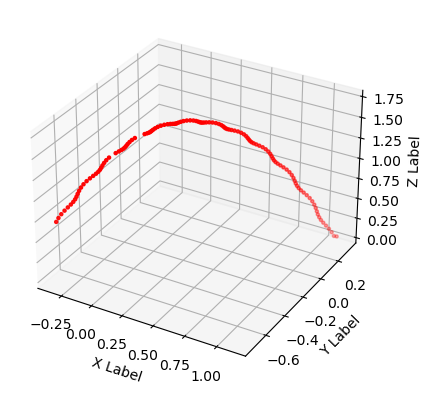

In [26]:
# plot motion_capture_data_array in 3D


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(motion_capture_data_array[:,0], motion_capture_data_array[:,1], motion_capture_data_array[:,2], c='r', marker='.')

ax.set_xlabel('X Label')

ax.set_ylabel('Y Label')

ax.set_zlabel('Z Label')

plt.show()

### Predicted Data

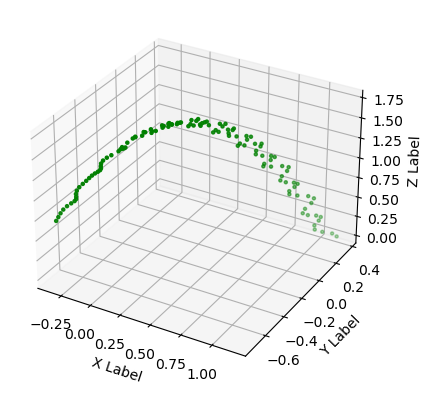

In [27]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(predicted_data_array[:,0], predicted_data_array[:,1], predicted_data_array[:,2], c='g', marker='.')

ax.set_xlabel('X Label')

ax.set_ylabel('Y Label')

ax.set_zlabel('Z Label')

plt.show()

### Motion Capture vs Predicted

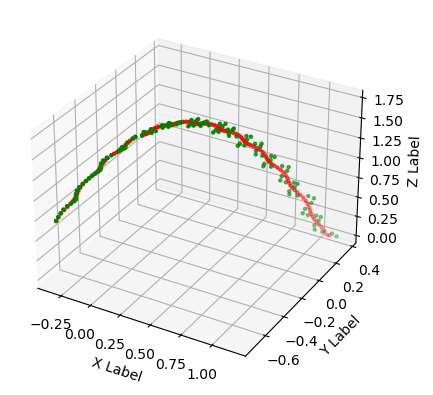

In [31]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(motion_capture_data_array[:,0], motion_capture_data_array[:,1], motion_capture_data_array[:,2], c='r', marker='.')
ax.scatter(predicted_data_array[:,0], predicted_data_array[:,1], predicted_data_array[:,2], c='g', marker='.')



ax.set_xlabel('X Label')

ax.set_ylabel('Y Label')

ax.set_zlabel('Z Label')

plt.show()

### motion_capture_x  vs clock_1 & predicted_x vs clock_2

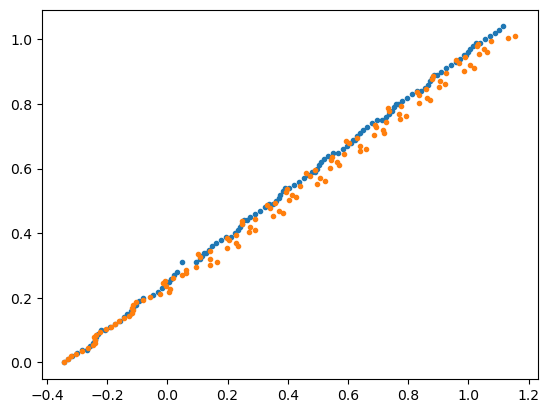

In [38]:

plt.plot(motion_capture_data_array[:,0], clock_1, '.')
plt.plot(predicted_data_array[:,0], clock_2, '.')

plt.show()


### motion_capture_y  vs clock_1 & predicted_y vs clock_2

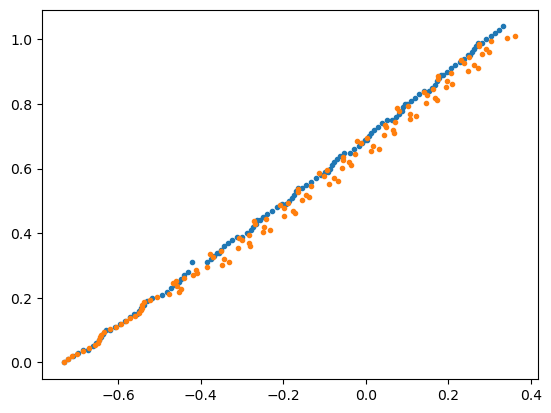

In [39]:

plt.plot(motion_capture_data_array[:,1], clock_1, '.')
plt.plot(predicted_data_array[:,1], clock_2, '.')

plt.show()


### motion_capture_z  vs clock_1 & predicted_z vs clock_2

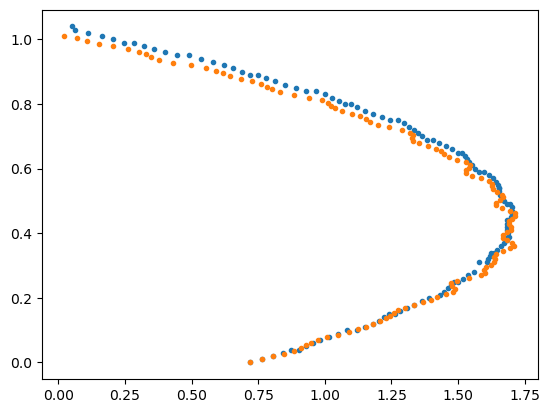

In [41]:

plt.plot(motion_capture_data_array[:,2], clock_1, '.')
plt.plot(predicted_data_array[:,2], clock_2, '.')

plt.show()
